In [42]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.dpi"] = 256

In [43]:
df = pd.read_excel('Online_Retail001.xlsx')

## 對 Quantity 進行資料清理

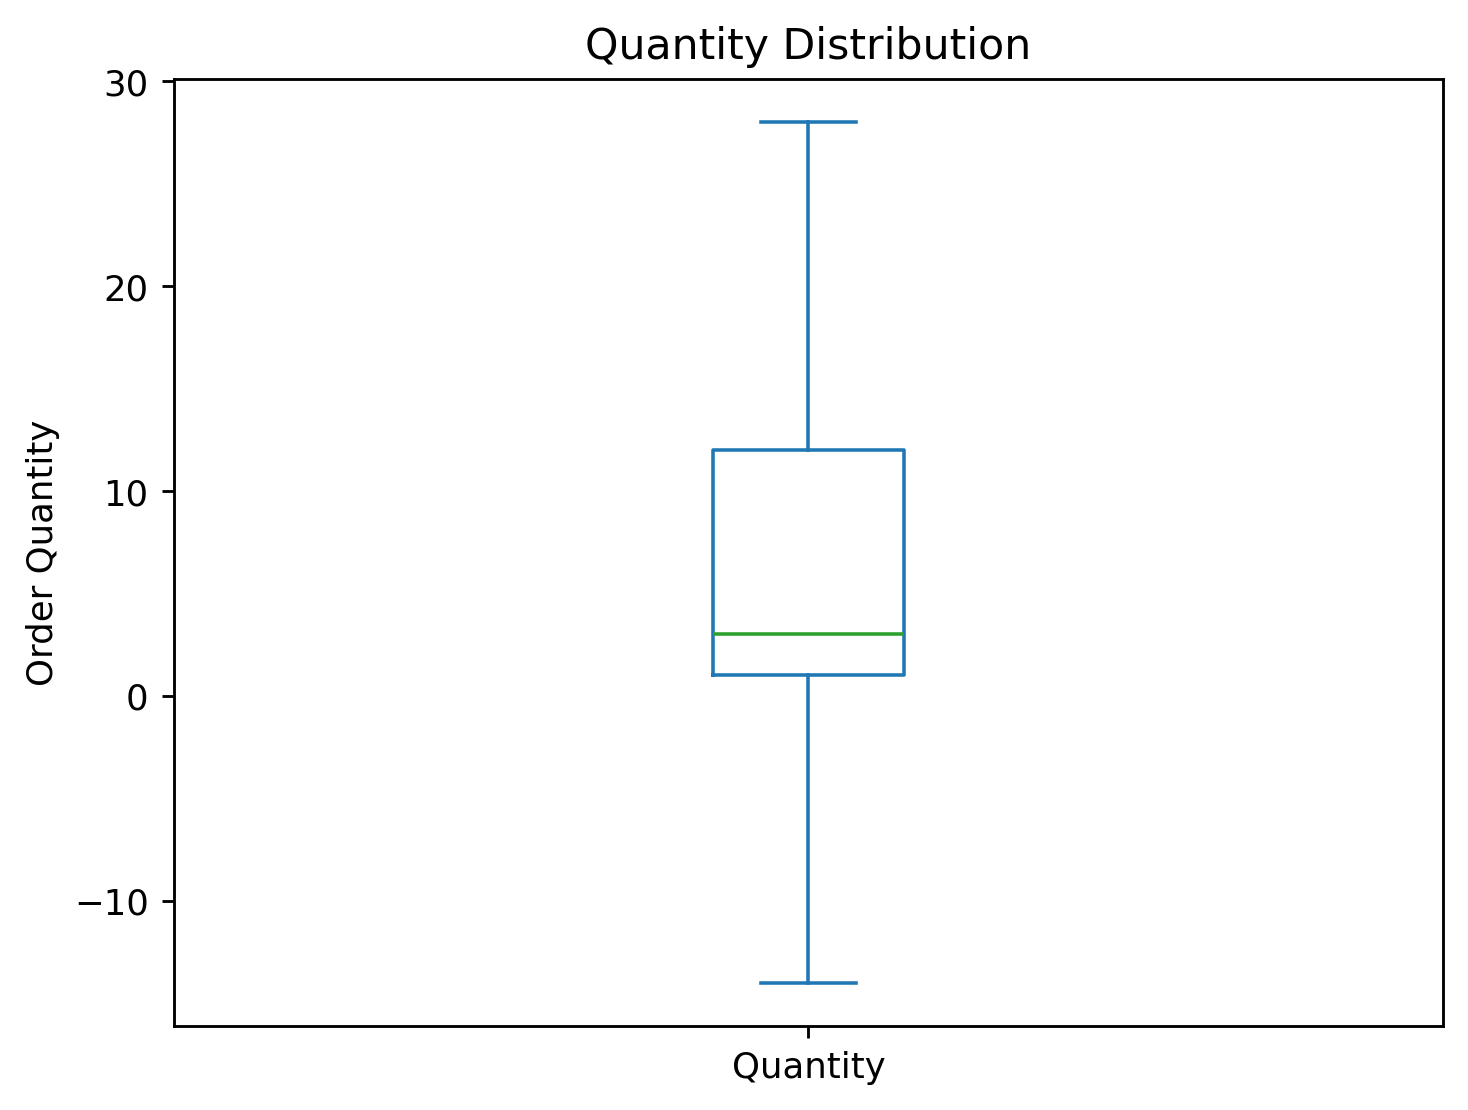

In [44]:
df['Quantity'].plot(kind='box', showfliers=False)

plt.ylabel('Order Quantity')
plt.title('Quantity Distribution')
plt.show()

In [45]:
df = df[df['Quantity'] > 0]
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,9791.000000,9791,9791.000000,7349.000000
mean,10.833010,2011-07-02 07:04:05.987131136,3.778015,15269.442373
min,1.000000,2010-12-01 08:45:00,0.000000,12347.000000
25%,1.000000,2011-03-24 13:08:00,1.250000,13923.000000
50%,4.000000,2011-07-15 10:27:00,2.080000,15128.000000
75%,12.000000,2011-10-18 10:17:30,4.130000,16764.000000
max,4000.000000,2011-12-09 12:50:00,736.380000,18283.000000
std,57.552806,NaN,14.334337,1705.369038


## 顧客編號空值清理

In [46]:
df['CustomerID'].isnull().sum()

np.int64(2442)

In [47]:
df.dropna(subset=['CustomerID'], inplace=True)
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,7349.000000,7349,7349.000000,7349.000000
mean,12.666349,2011-07-07 20:03:14.108041728,2.962449,15269.442373
min,1.000000,2010-12-01 08:45:00,0.001000,12347.000000
25%,2.000000,2011-04-03 15:22:00,1.250000,13923.000000
50%,6.000000,2011-07-24 11:54:00,1.950000,15128.000000
75%,12.000000,2011-10-18 15:22:00,3.750000,16764.000000
max,2880.000000,2011-12-09 12:50:00,300.000000,18283.000000
std,45.978377,NaN,5.326559,1705.369038


## 計算銷售總額

In [48]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.00
1,536375,71053,WHITE METAL LANTERN,6,2010-12-01 09:32:00,3.39,17850.0,United Kingdom,20.34
2,536381,21934,SKULL SHOULDER BAG,10,2010-12-01 09:41:00,1.65,15311.0,United Kingdom,16.50
3,536381,47580,TEA TIME DES TEA COSY,2,2010-12-01 09:41:00,2.55,15311.0,United Kingdom,5.10
4,536384,22424,ENAMEL BREAD BIN CREAM,8,2010-12-01 09:53:00,10.95,18074.0,United Kingdom,87.60


## 訂單匯總

根據顧客編號匯總訂單資料，算出銷售額平均、次數、最大間隔時間、每次平均間隔時間

In [49]:
summary_df = df.groupby(['CustomerID']).agg(
    sales_min=('Sales', 'min'),
    sales_max=('Sales', 'max'),
    sales_sum=('Sales', 'sum'),
    sales_avg=('Sales', 'mean'),
    sales_count=('Sales', 'count'),
    invoicedate_min=('InvoiceDate', 'min'),
    invoicedate_max=('InvoiceDate', 'max'),
    invoicedate_purchase_duration=('InvoiceDate', lambda x: (x.max() - x.min()).days),
    invoicedate_purchase_frequency=('InvoiceDate', lambda x: (x.max() - x.min()).days / x.count())
)

summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,8.40,19.80,28.20,14.100000,2,2011-04-07 10:43:00,2011-12-07 15:52:00,244,122.000000
12348.0,40.00,40.00,40.00,40.000000,1,2011-09-25 13:13:00,2011-09-25 13:13:00,0,0.000000
12349.0,16.50,300.00,339.00,113.000000,3,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12352.0,17.85,18.75,36.60,18.300000,2,2011-02-16 12:33:00,2011-09-28 14:58:00,224,112.000000
12354.0,23.40,23.40,23.40,23.400000,1,2011-04-21 13:11:00,2011-04-21 13:11:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18261.0,17.00,17.00,17.00,17.000000,1,2011-09-05 09:34:00,2011-09-05 09:34:00,0,0.000000
18263.0,19.92,20.40,40.32,20.160000,2,2011-04-01 11:48:00,2011-11-14 09:00:00,226,113.000000
18265.0,15.90,15.90,15.90,15.900000,1,2011-09-28 14:10:00,2011-09-28 14:10:00,0,0.000000


## 篩選至少購買兩次顧客（回頭客）

In [50]:
summary_df = summary_df[summary_df['sales_count'] > 1]
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,8.40,19.80,28.20,14.100000,2,2011-04-07 10:43:00,2011-12-07 15:52:00,244,122.000000
12349.0,16.50,300.00,339.00,113.000000,3,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12352.0,17.85,18.75,36.60,18.300000,2,2011-02-16 12:33:00,2011-09-28 14:58:00,224,112.000000
12357.0,18.96,30.00,48.96,24.480000,2,2011-11-06 16:07:00,2011-11-06 16:07:00,0,0.000000
12359.0,16.50,17.85,51.30,17.100000,3,2011-06-03 12:26:00,2011-10-13 12:47:00,132,44.000000
...,...,...,...,...,...,...,...,...,...
18252.0,3.40,4.95,8.35,4.175000,2,2011-10-20 12:43:00,2011-10-20 12:43:00,0,0.000000
18257.0,8.50,11.70,20.20,10.100000,2,2011-05-17 10:10:00,2011-08-17 14:47:00,92,46.000000
18263.0,19.92,20.40,40.32,20.160000,2,2011-04-01 11:48:00,2011-11-14 09:00:00,226,113.000000


加入 duration 的判斷，確認是購買兩次以上

In [51]:
summary_df1 = summary_df[(summary_df['sales_count'] > 1) & (summary_df['invoicedate_purchase_duration'] > 0)]
summary_df1

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,8.40,19.80,28.20,14.100000,2,2011-04-07 10:43:00,2011-12-07 15:52:00,244,122.000000
12352.0,17.85,18.75,36.60,18.300000,2,2011-02-16 12:33:00,2011-09-28 14:58:00,224,112.000000
12359.0,16.50,17.85,51.30,17.100000,3,2011-06-03 12:26:00,2011-10-13 12:47:00,132,44.000000
12360.0,5.04,20.00,76.66,12.776667,6,2011-05-23 09:43:00,2011-10-18 15:22:00,148,24.666667
12362.0,16.50,46.80,173.98,28.996667,6,2011-08-11 15:02:00,2011-12-06 15:40:00,117,19.500000
...,...,...,...,...,...,...,...,...,...
18245.0,7.80,15.00,33.00,11.000000,3,2010-12-19 14:58:00,2011-01-31 11:46:00,42,14.000000
18257.0,8.50,11.70,20.20,10.100000,2,2011-05-17 10:10:00,2011-08-17 14:47:00,92,46.000000
18263.0,19.92,20.40,40.32,20.160000,2,2011-04-01 11:48:00,2011-11-14 09:00:00,226,113.000000


## 繪圖：顧客購買次數分布圖，結果發現出現10次以下的購買

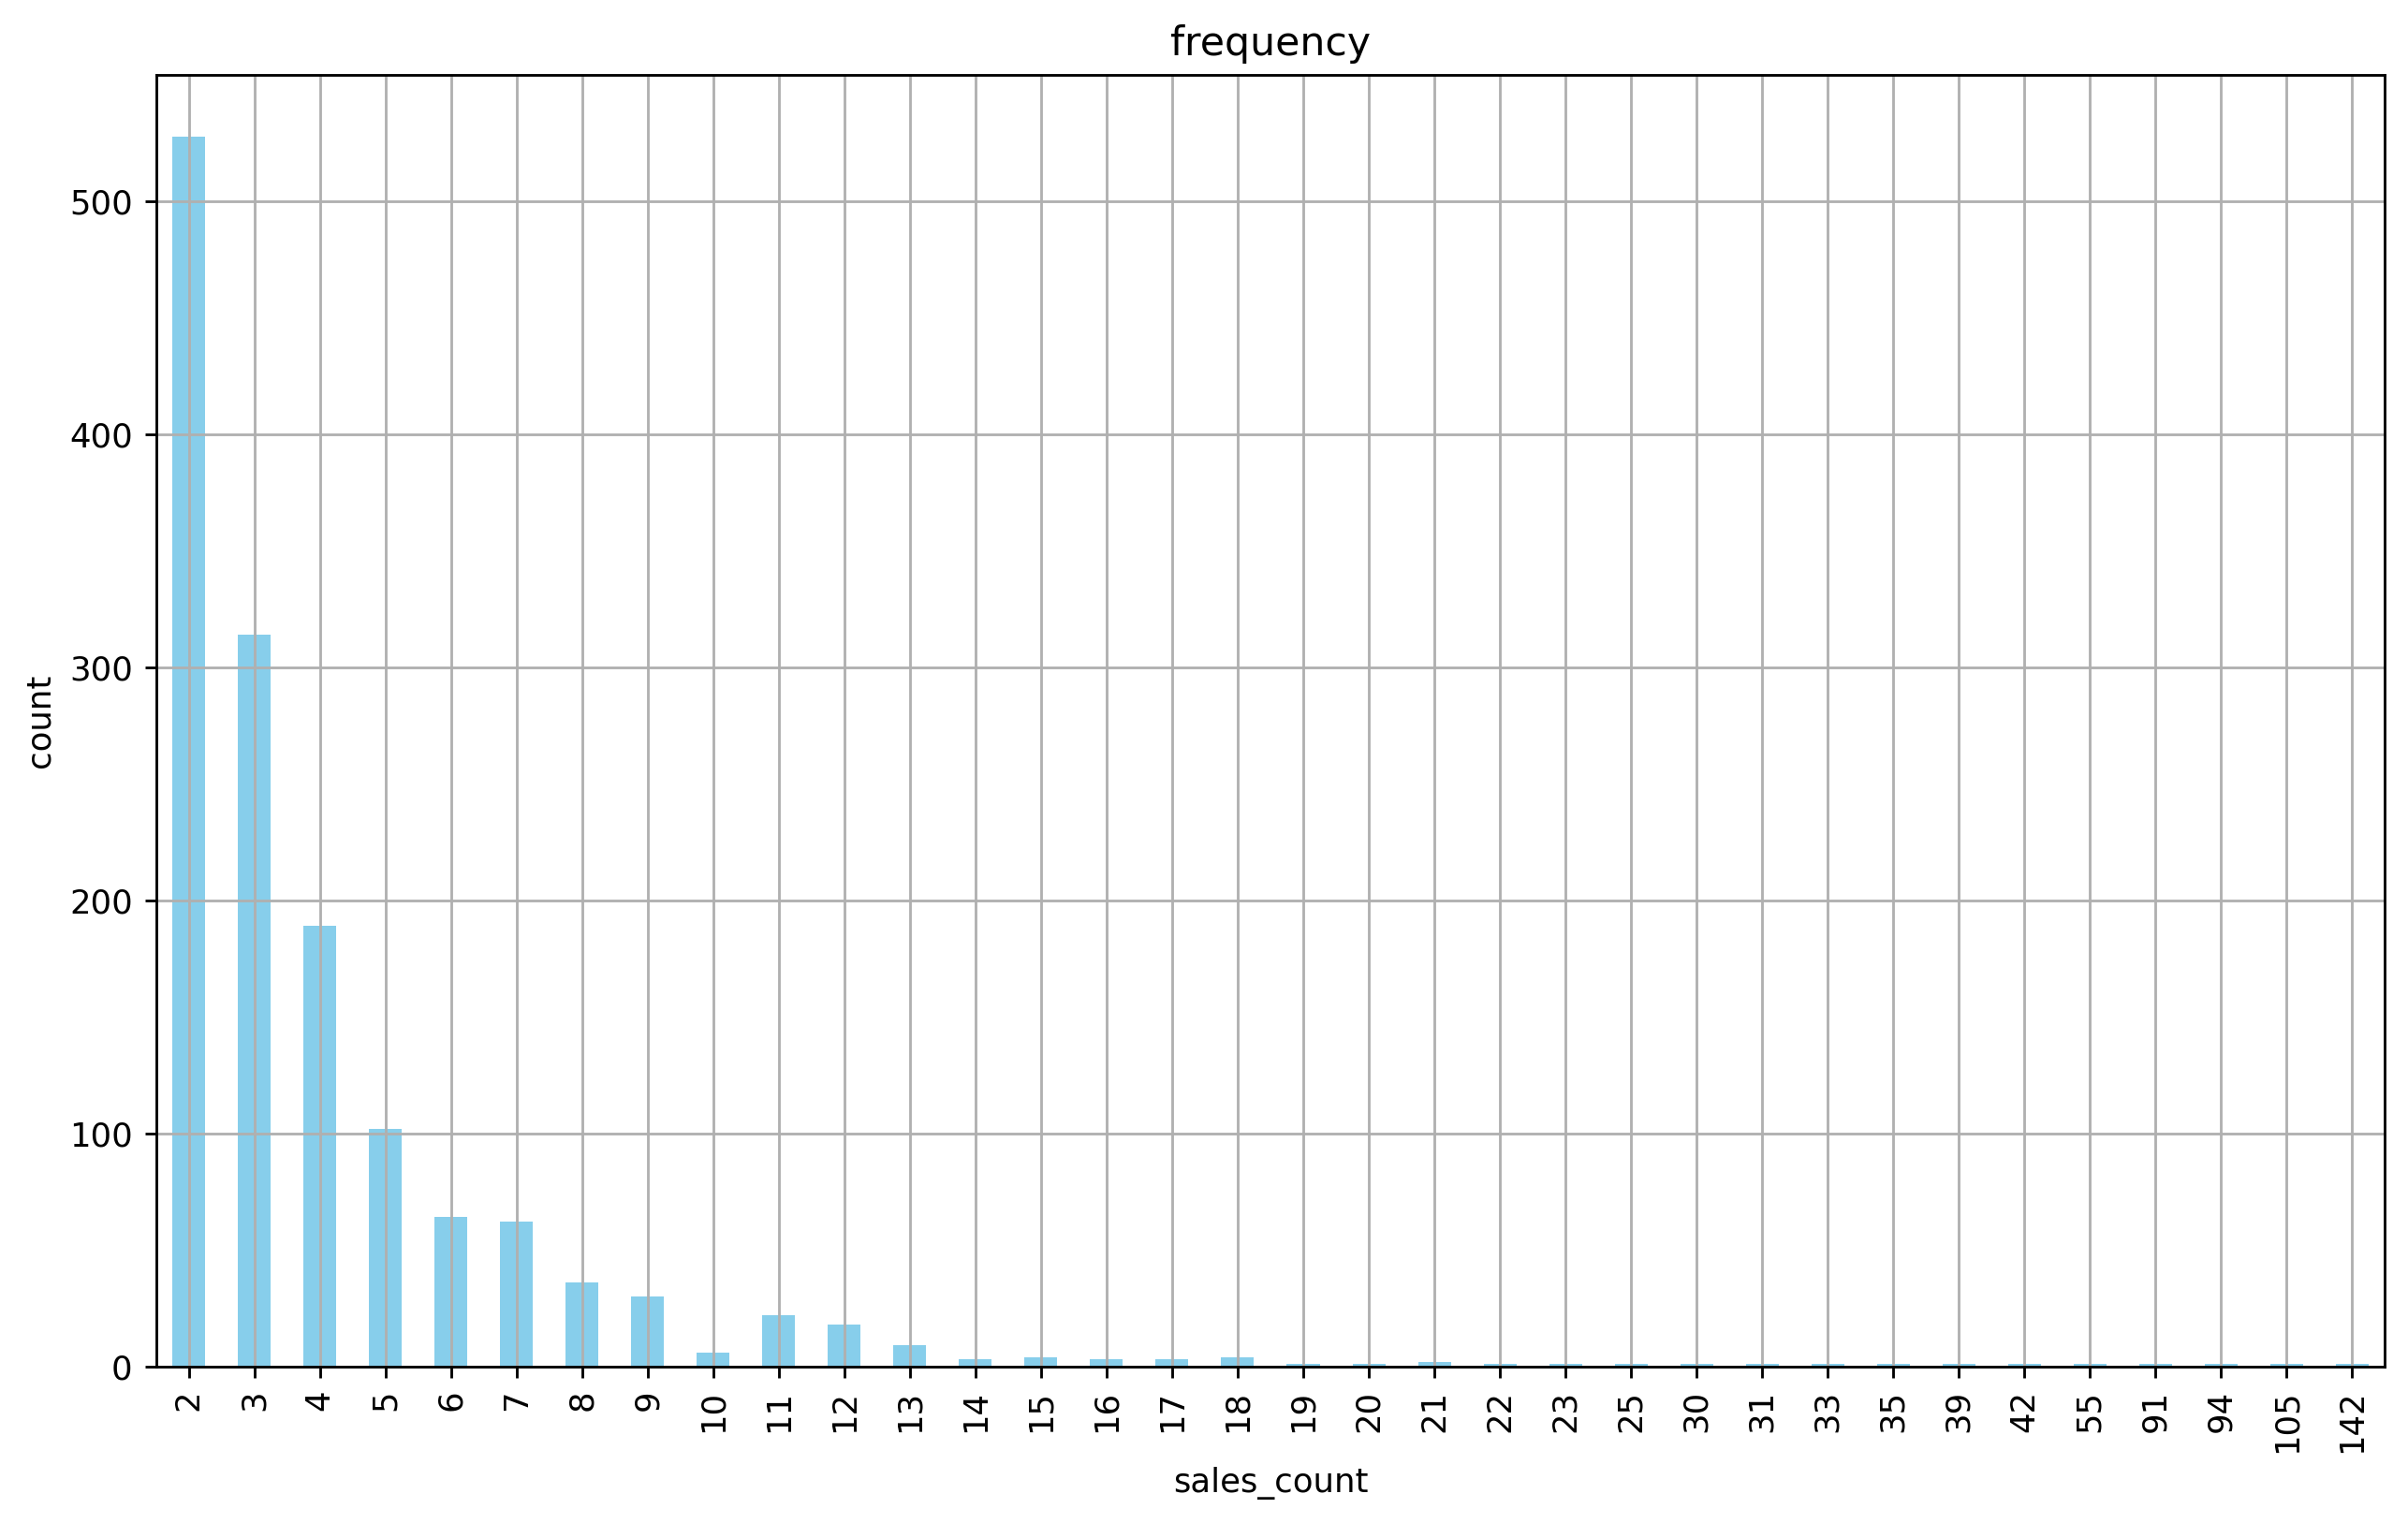

In [52]:
summary_df.groupby('sales_count')['sales_avg'].count().plot(
    kind='bar',
    color='skyblue',
    figsize=(12, 7),
    grid=True,
)

plt.title('frequency')
plt.ylabel('count')

plt.show()

In [53]:
summary_df['sales_count'].describe()

count    1415.000000
mean        4.520141
std         6.808306
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       142.000000
Name: sales_count, dtype: float64

In [54]:
summary_df['sales_avg'].describe()

count    1415.000000
mean       20.036153
std        35.724937
min         0.653333
25%         6.909125
50%        14.500000
75%        20.608143
max       821.893750
Name: sales_avg, dtype: float64

### 問題

繪圖：顧客購買間隔時間分布圖，結果發現平均20-50天出現購買行為。使用hist，因為invoicedate_purchase_frequency為連續數值。

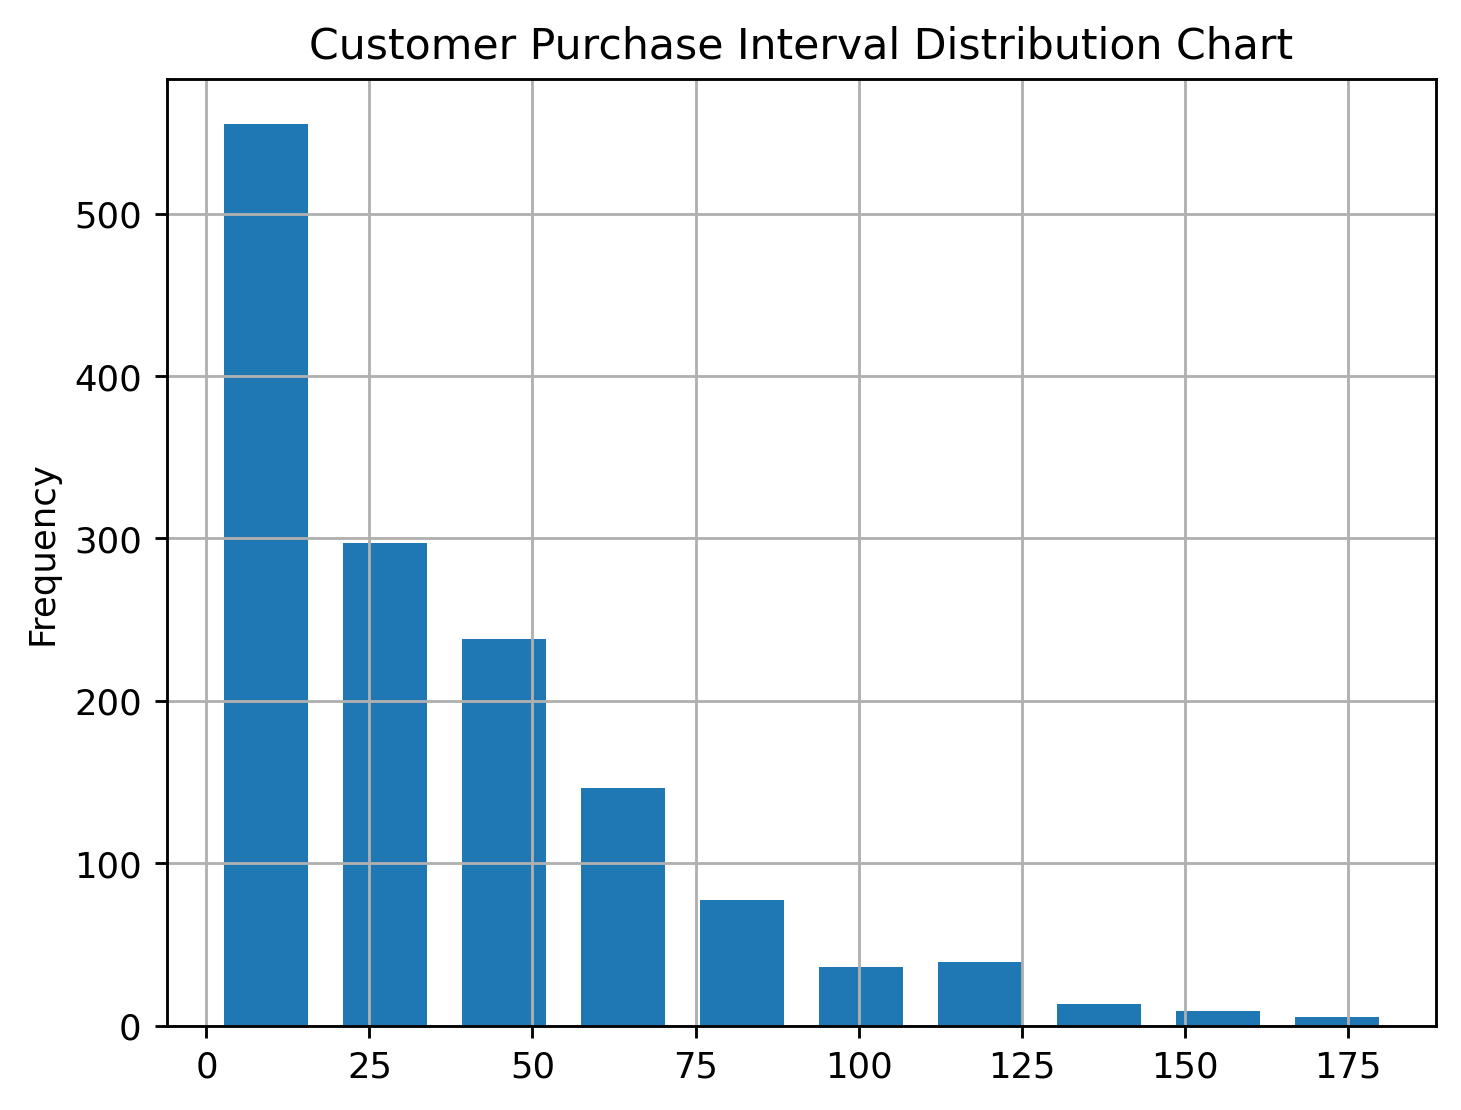

In [60]:
summary_df["invoicedate_purchase_frequency"].plot(
    kind="hist",
    bins=10,
    grid=True,
    rwidth=0.7,  # 直方圖每柱的間距
)

plt.title("Customer Purchase Interval Distribution Chart")
plt.show()

## 問題：請計算每一個顧客的購買總數量、總銷售額、總訂單次數

提示：

1. 請先依 `CustomerID`,`InvoiceNo` 組群，算出 `Quantity` 總數，`Sales` 總數
2. 依顧客編號組群，算出 `Quantity` 總數，`Sales` 總數，`InvoiceNo` 總數

In [64]:
df_qs_sum = df.groupby(["CustomerID", "InvoiceNo"]).agg(
    quantity_sum=('Quantity', 'sum'),
    sales_sum=('Sales', 'sum')
)
df_qs_sum

quantity_sum  sales_sum
CustomerID InvoiceNo                         
12347.0    549222               12      19.80
           581180               20       8.40
12348.0    568172                1      40.00
12349.0    577609                9     339.00
12352.0    544156                3      17.85
...                            ...        ...
18283.0    557956                4       3.80
           565579                3       6.30
           575668                1       1.25
           578262                9      15.77
           579673                1       1.65

[5235 rows x 2 columns]

In [66]:
df_qs_sum.groupby('CustomerID').agg(
    quantity_sum=('quantity_sum', 'sum'),
    sales_sum=('sales_sum', 'sum'),
    invoice_count=('quantity_sum', 'count')
)

,quantity_sum,sales_sum,invoice_count
CustomerID,,,
12347.0,32,28.20,2
12348.0,1,40.00,1
12349.0,9,339.00,1
12352.0,6,36.60,2
12354.0,12,23.40,1
...,...,...,...
18261.0,4,17.00,1
18263.0,48,40.32,2
18265.0,2,15.90,1
